# Smishing Detection Model Using MultinomialNB

This model aims to detect whether the messages recieved by users are smishing or not.

## Importing dependencies

In [1]:
import pandas as pd
import numpy as np

## Loading the dataset

The dataset came from Github and it is consists of 5,572 legit and smishing text messages.

In [2]:
smish_df = pd.read_csv('data/spam.csv')

In [3]:
smish_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
smish_df.groupby('Category').describe()

Message                                                             
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later  \
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

## Creating a classification column

It is essential for us to make another predictive column that contains numerical data (1 = smishing, 0 =  not smishing) to make the model more efficient.

In [5]:
smish_df['smish'] = smish_df['Category'].apply(lambda x: 1 if x=='spam' else 0)
smish_df.head()

,Category,Message,smish
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Splitting the dataset into training and testing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(smish_df['Message'], smish_df['smish'], test_size=0.25)

## Creating a pipeline for the model

In selecting a model to use, I chose Multinomial Naive Bayes as a classification model. MultinomialNB is a probabilistic learning method that is mostly used in text classification. Since the model aims to detect text messages, I think this model is the best choice. I also used CountVectorizer to convert the text messages into a matrix of token counts. These tokens are words or phrases that are used as features of the text messages. I have also pipelined the model so that the preprocessing will be consistent and the inference will be easier.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
# Pipeline: CountVectorizer -> MultinomialNB
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [10]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

## Model evalutaion

It is basically to see how well does the model perform.

In [11]:
from sklearn import metrics

In [13]:
predictions = pipeline.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1200
           1       0.98      0.90      0.94       193

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.97      1393
weighted avg       0.98      0.98      0.98      1393



In [16]:
print('Accuracy Score: {:.1f}%'.format(metrics.accuracy_score(y_test, predictions) * 100))

Accuracy Score: 98.4%


In [30]:
cf = metrics.confusion_matrix(y_test, predictions)

tp, fp, tn, fn = cf.ravel()

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

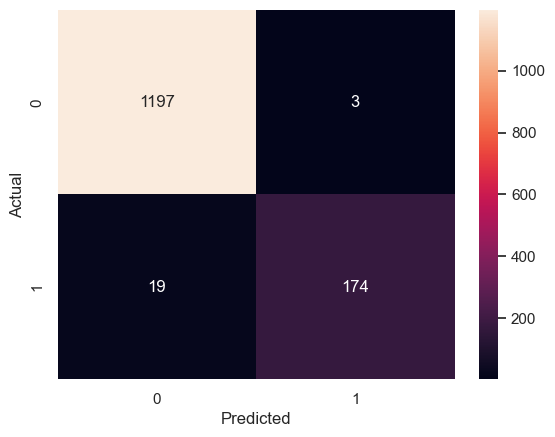

In [27]:
sns.heatmap(cf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
recall = metrics.recall_score(y_test, predictions) * 100
precision = metrics.precision_score(y_test, predictions) * 100
accuracy = metrics.accuracy_score(y_test, predictions) * 100
type_1_err = (fp / (fp + tn)) * 100
type_2_err = (fn / (fn + tp)) * 100

print('Recall: {:.1f}%'.format(recall))
print('Precision: {:.1f}%'.format(precision))
print('Accuracy: {:.1f}%'.format(accuracy))
print('Type I Error: {:.1f}%'.format(type_1_err))
print('Type II Error: {:.1f}%'.format(type_2_err))

Recall: 90.2%
Precision: 98.3%
Accuracy: 98.4%
Type I Error: 13.6%
Type II Error: 12.7%


## Inference

Testing out if the model actually works as intended

In [33]:
#run an inference
def predict_smish(msg):
    if pipeline.predict([msg])[0] == 1:
        print('Potentially a smishing message!')
    else:
        print('Not a smishing message.')

In [34]:
text = 'You have won a $1000 Walmart gift card. Please click here to claim.'
predict_smish(text)

Potentially a smishing message!


## Saving the model

In [35]:
import pickle

In [36]:
#save the model
with open('smish_detector.pkl', 'wb') as f:
    pickle.dump(pipeline, f)